In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('/content/sample_data/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris = load_iris()
iris_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns=iris['feature_names'] + ['target'])
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
data.shape

(150, 5)

In [6]:
print(iris_data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


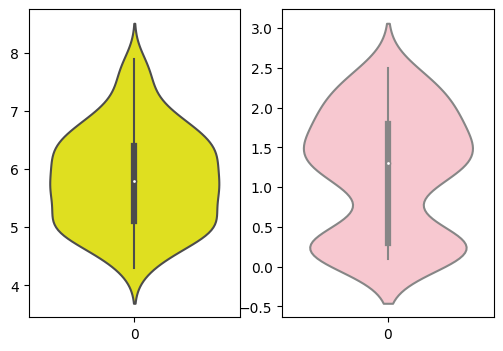

In [8]:
col = ['sepal_length', 'petal_width']
colors = ['yellow', 'pink']
plt.figure(figsize=(6,4))
for i in range (2):
    plt.subplot(1,2,i+1)
    sns.violinplot(data[col[i]], color=colors[i])
plt.show()

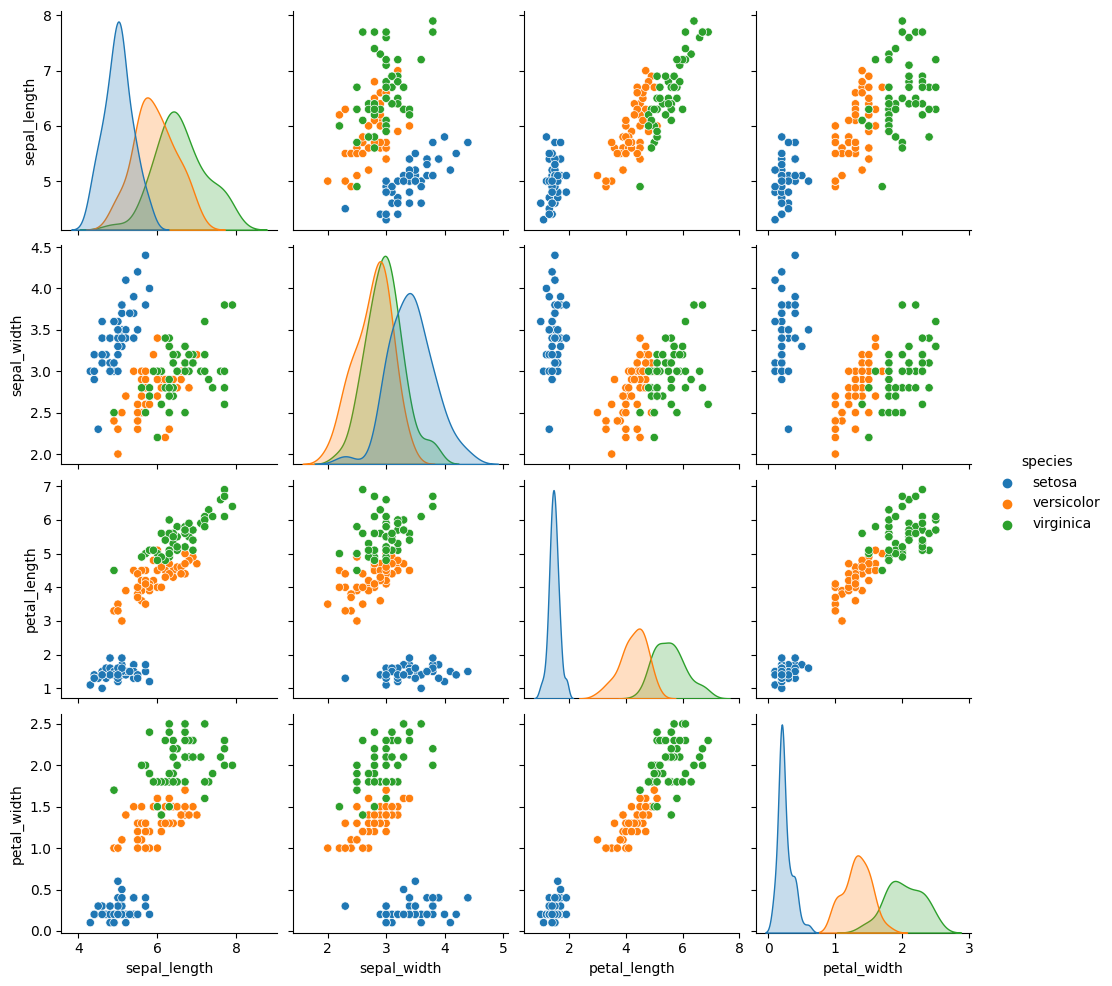

In [9]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")
plt.show()

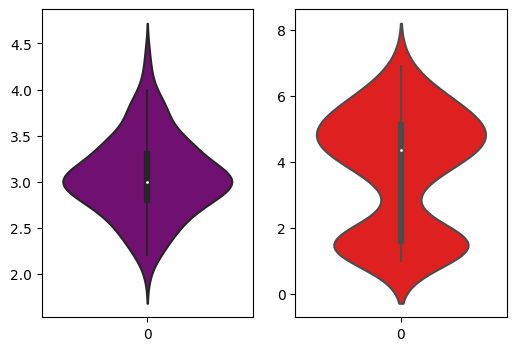

In [10]:
col = ['sepal_width', 'petal_length']
colors = ['purple', 'red']
plt.figure(figsize=(6,4))
for i in range (2):
    plt.subplot(1,2,i+1)
    sns.violinplot(data[col[i]], color=colors[i])
plt.show()

<Axes: xlabel='species', ylabel='count'>

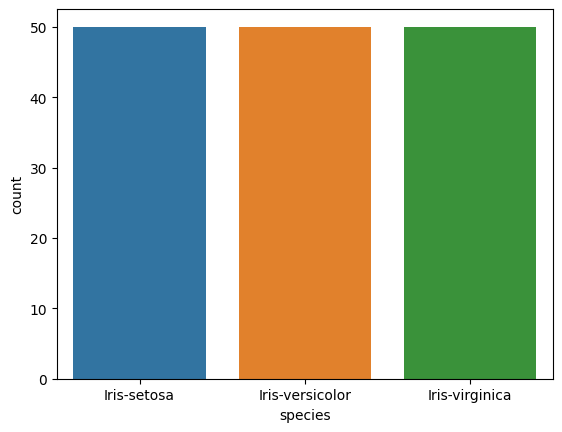

In [11]:
X = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scale = MinMaxScaler()
scaledX = scale.fit_transform(data[X])
x = scaledX
encoder = LabelEncoder()
y = encoder.fit_transform(data['species'])
sns.countplot(x='species', data=data)

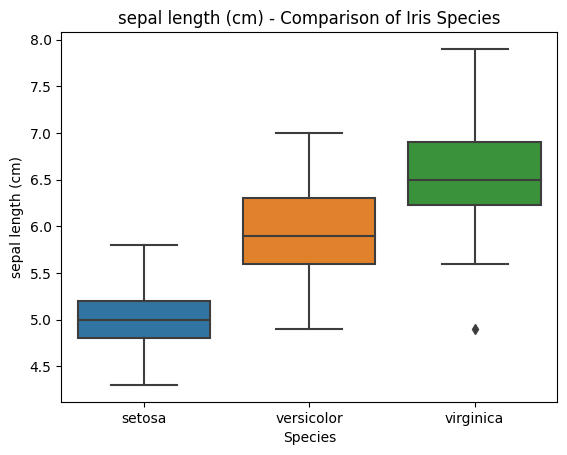

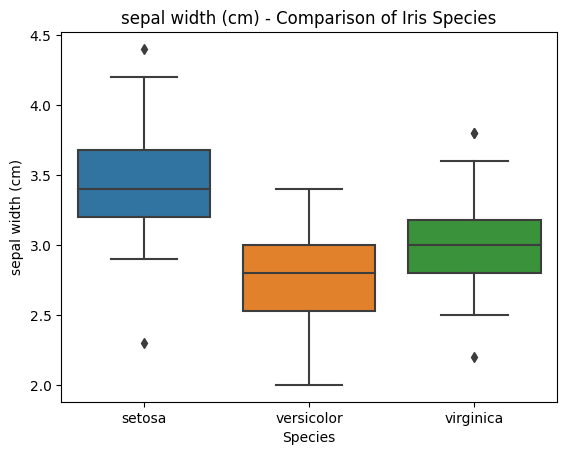

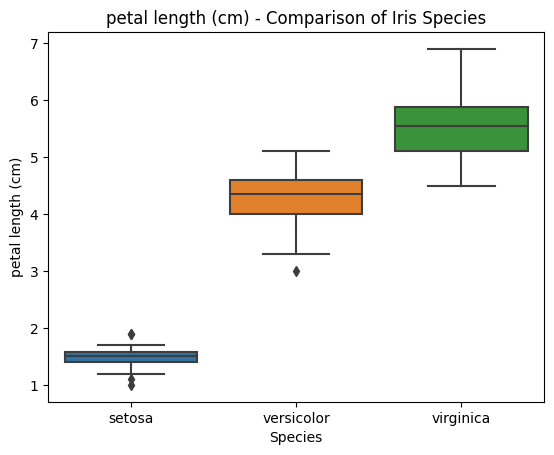

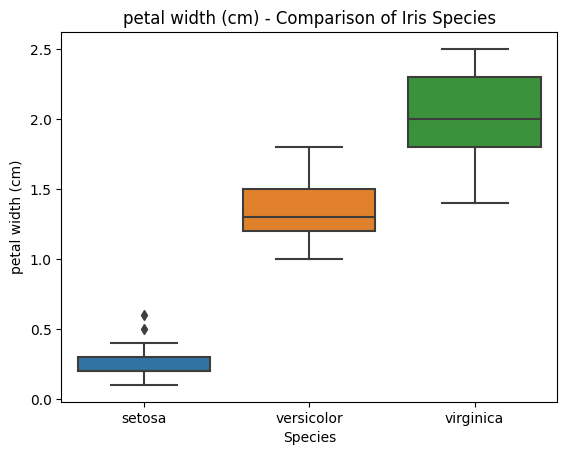

In [12]:
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target_names[iris.target]

for feature in iris.feature_names:
    plt.figure()
    sns.boxplot(x='species', y=feature, data=iris_data)
    plt.title(f"{feature} - Comparison of Iris Species")
    plt.xlabel("Species")
    plt.ylabel(feature)
    plt.show()

In [13]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()

model.fit(X_train, y_train)

SVC()

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



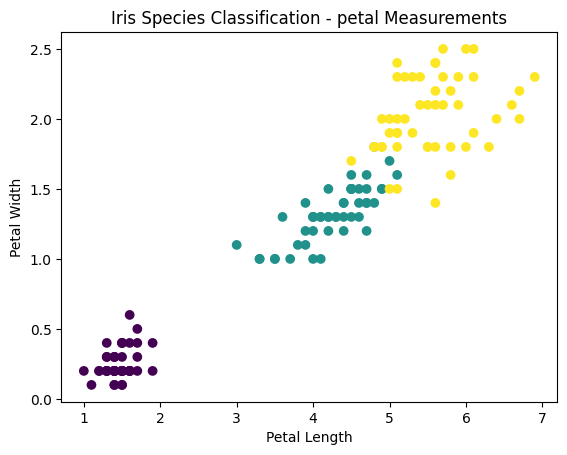

In [15]:
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Species Classification - petal Measurements')
plt.show()
sepal_length = 5.1
sepal_width = 3.5
petal_length = 1.4
petal_width = 0.2

In [16]:
new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
predicted_label = model.predict(new_data)
predicted_species = iris.target_names[predicted_label[0]]
print("Predicted species:", predicted_species)

Predicted species: setosa


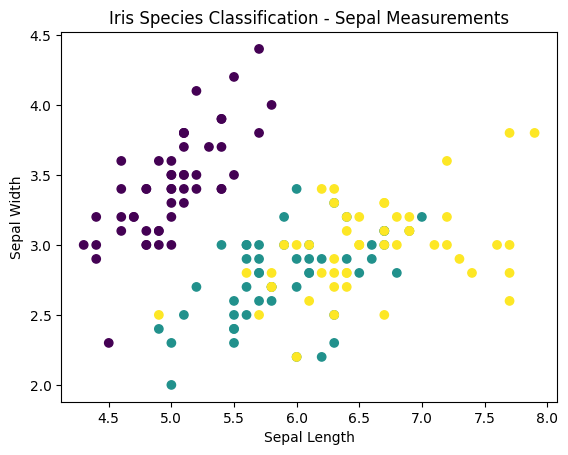

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Species Classification - Sepal Measurements')
plt.show()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
modelLogReg = LogisticRegression()
modelLogReg.fit(x_train, y_train)
y_pred = modelLogReg.predict(x_test)
print('ConfusionMatrix:\n {}' .format(confusion_matrix(y_test, y_pred)))
print('Accuracy Score is : {}' .format(accuracy_score(y_test, y_pred)*100))

ConfusionMatrix:
 [[11  0  0]
 [ 0 11  2]
 [ 0  1  5]]
Accuracy Score is : 90.0


In [19]:
modelDecTreeClassifier = DecisionTreeClassifier(criterion = 'entropy')
modelDecTreeClassifier.fit(x_train, y_train)
y_pred = modelDecTreeClassifier.predict(x_test)
print('ConfusionMatrix:\n {}' .format(confusion_matrix(y_test, y_pred)))
print('Accuracy Score is : {}' .format(accuracy_score(y_test, y_pred)*100))

ConfusionMatrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy Score is : 100.0


In [20]:
modelRandomForestClassifier = RandomForestClassifier(criterion='gini', max_depth=2)
modelRandomForestClassifier.fit(x_train, y_train)
y_pred = modelRandomForestClassifier.predict(x_test)
print('ConfusionMatrix:\n {}' .format(confusion_matrix(y_test, y_pred)))
print('Accuracy Score is : {}' .format(accuracy_score(y_test, y_pred)*100))

ConfusionMatrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy Score is : 96.66666666666667


In [21]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [22]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred = dtc.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [24]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0